# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) 
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating URL query
url_query = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q="

# Creating lists to append data from API requests
clouds = []
dates = []
humidity = []
lats = []
lons = []
max_temps = []
wind_speed = []
city_name = []
country = []

#Setting the counter for each call to reflect format
count = 0 
#Setting the counter for sets to reflect format
set_group =1

#Printing statement before the call
print("Beginning Data Retrieval")
print("-----------------------------")


# Using cities in the "cities" list sending API requesrts to retrieve information for the empty lists above
for city in cities:
    
    try:
        response = requests.get(url_query + city.replace(" ","&")).json()# Creating json request for each city in the list 
        #Pulling information from json response into the lists created above
        clouds.append(response["clouds"]["all"]) 
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        #Pulling information from the "cities" list instead of json respond (jason returns incomplete name in some cases)
        city_name.append(city)
        country.append(response["sys"]["country"])
        cities_count = response["name"]
        #Printing discription for each json response
        print(f"Processing Record {count} of Set {set_group} | {city}")
        print(f"{url_query}{city}")
        #Adding conditions for counting records/Sets of records
        if count > 49:
            count= 1
            set_group += 1
        else:
            count += 1
    #Adding error exception and print message if the city information was not found         
    except:
        print("City not found. Skipping...")
    continue
#Adding end of requests print message when requests are completed    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 0 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=katsuura
Processing Record 1 of Set 1 | koson
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=koson
Processing Record 2 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=albany
Processing Record 3 of Set 1 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=dingle
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=punta arenas
Processing Record 5 of Set 1 | baie-comeau
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=baie-comeau
Proce

Processing Record 4 of Set 2 | basar
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=basar
Processing Record 5 of Set 2 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=flinders
Processing Record 6 of Set 2 | humacao
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=humacao
Processing Record 7 of Set 2 | buala
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=buala
Processing Record 8 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=cape town
Processing Record 9 of Set 2 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mayo
Processing Record 10 of Set 2 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5

Processing Record 6 of Set 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ponta do sol
Processing Record 7 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=tiksi
Processing Record 8 of Set 3 | avera
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=avera
Processing Record 9 of Set 3 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=lagoa
Processing Record 10 of Set 3 | zermatt
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=zermatt
Processing Record 11 of Set 3 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=esperance
Processing Record 12 of Set 3 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=7998

City not found. Skipping...
Processing Record 8 of Set 4 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=half moon bay
Processing Record 9 of Set 4 | semporna
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=semporna
Processing Record 10 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ilulissat
Processing Record 11 of Set 4 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=laguna
Processing Record 12 of Set 4 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=arlit
Processing Record 13 of Set 4 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=santiago del estero
Processing Record 14 of Set 4 | 

Processing Record 12 of Set 5 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=okhotsk
Processing Record 13 of Set 5 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=narsaq
Processing Record 14 of Set 5 | ambanja
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ambanja
Processing Record 15 of Set 5 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=vestmannaeyjar
Processing Record 16 of Set 5 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sabang
Processing Record 17 of Set 5 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=fortuna
Processing Record 18 of Set 5 | hasaki
http://api.openweathermap.org/data/2.5/weathe

Processing Record 16 of Set 6 | buluang
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=buluang
Processing Record 17 of Set 6 | ola
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ola
Processing Record 18 of Set 6 | katangli
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=katangli
Processing Record 19 of Set 6 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=hamilton
Processing Record 20 of Set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=saskylakh
Processing Record 21 of Set 6 | karabulak
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=karabulak
Processing Record 22 of Set 6 | torbay
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 20 of Set 7 | dovolnoye
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=dovolnoye
Processing Record 21 of Set 7 | sistranda
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sistranda
Processing Record 22 of Set 7 | wasilla
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=wasilla
City not found. Skipping...
Processing Record 23 of Set 7 | oussouye
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=oussouye
Processing Record 24 of Set 7 | makurdi
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=makurdi
City not found. Skipping...
Processing Record 25 of Set 7 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=nouadhibou
Processing Record 26 o

Processing Record 22 of Set 8 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mount gambier
Processing Record 23 of Set 8 | samarinda
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=samarinda
Processing Record 24 of Set 8 | cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=cabedelo
Processing Record 25 of Set 8 | glendive
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=glendive
Processing Record 26 of Set 8 | pasighat
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=pasighat
Processing Record 27 of Set 8 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=puerto ayacucho
Processing Record 28 of Set 8 | luanda
http://api.openwe

Processing Record 25 of Set 9 | fare
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=fare
Processing Record 26 of Set 9 | canutama
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=canutama
Processing Record 27 of Set 9 | darhan
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=darhan
Processing Record 28 of Set 9 | abapo
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=abapo
Processing Record 29 of Set 9 | brigantine
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=brigantine
Processing Record 30 of Set 9 | ritchie
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ritchie
Processing Record 31 of Set 9 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 27 of Set 10 | rudnya
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=rudnya
Processing Record 28 of Set 10 | whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=whitehorse
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 10 | newport
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=newport
City not found. Skipping...
Processing Record 30 of Set 10 | craig
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=craig
Processing Record 31 of Set 10 | terney
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=terney
Processing Record 32 of Set 10 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=port ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
        * Display the DataFrame

In [4]:
#Creating a dictionary to organize retrieved data
city_weather = {
    "City":city_name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":max_temps,
    "Wind Speed":wind_speed
    
}
#Converting dictionary into a Data Frame
city_weather_df = pd.DataFrame(city_weather)
#Making a csv output file 
city_weather_df.to_csv("City_Weather.csv")
#Verifying the number of data rows in the DF
city_weather_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [5]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,katsuura,75,JP,1578466156,44,33.93,134.50,59.00,27.51
1,koson,10,UZ,1578466156,70,39.04,65.59,42.80,11.41
2,albany,75,US,1578466112,74,42.65,-73.75,30.99,3.36
3,dingle,100,PH,1578466156,69,11.00,122.67,83.48,10.83
4,punta arenas,40,PH,1578466156,70,14.18,121.12,87.01,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

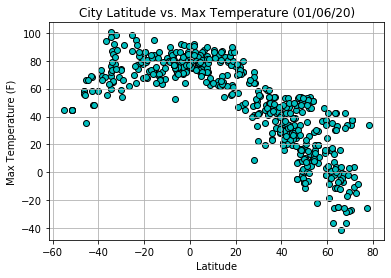

In [6]:
#Plotting Scatter Plot which reflects relationship between Latitude and Maximum Tempterure 
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Max Temperature (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

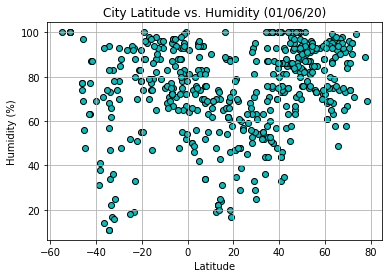

In [7]:
#Plotting Scatter Plot which reflects relationship between Latitude and Humidity 
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Humidity (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

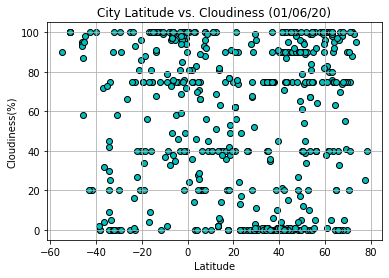

In [8]:
#Plotting Scatter Plot which reflects relationship between Latitude and Cloudiness 
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Cloudiness (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

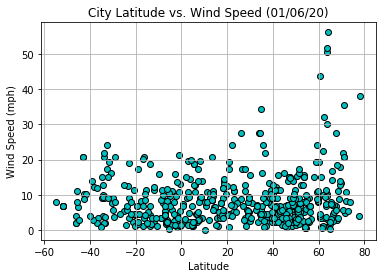

In [9]:
#Plotting Scatter Plot which reflects relationship between Latitude and Wind Speed
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Wind Speed (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Lat_vs_Wind.png")
plt.show()